In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Fake_Bill.csv to Fake_Bill (1).csv


In [6]:
Fake_Bill = pd.read_csv("Fake_Bill.csv")
Fake_Bill

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810000,104.860000,104.950000,4.520000,2.890000,112.830000
1,True,171.460000,103.360000,103.660000,3.770000,2.990000,113.090000
2,True,172.690000,104.480000,103.500000,4.400000,2.940000,113.160000
3,True,171.360000,103.910000,103.940000,3.620000,3.010000,113.510000
4,True,171.730000,104.280000,103.460000,4.040000,3.480000,112.540000
...,...,...,...,...,...,...,...
99995,True,172.591559,104.015133,103.564239,3.341976,2.809382,112.957642
99996,False,171.764889,103.901801,103.452420,4.242194,3.415704,111.716208
99997,True,171.411680,103.977614,104.128636,3.761649,3.520680,114.425646
99998,True,172.004731,103.780598,103.843138,4.969756,3.239390,113.431804


# EDA

In [7]:
print(type(Fake_Bill))
print(Fake_Bill.shape)
print(Fake_Bill.size)

<class 'pandas.core.frame.DataFrame'>
(100000, 7)
700000


In [8]:
Fake_Bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   is_genuine    100000 non-null  bool   
 1   diagonal      100000 non-null  float64
 2   height_left   100000 non-null  float64
 3   height_right  100000 non-null  float64
 4   margin_low    100000 non-null  float64
 5   margin_up     100000 non-null  float64
 6   length        100000 non-null  float64
dtypes: bool(1), float64(6)
memory usage: 4.7 MB


### Observations
* The dataset contains 100,000 rows and 7 columns
* is_genuine: (Boolean) categorical
* diagonal, height_left, height_right, margin_low, margin_up, length: All are continuous numerical features

In [9]:
Fake_Bill.isna().sum()

,0
is_genuine,0
diagonal,0
height_left,0
height_right,0
margin_low,0
margin_up,0
length,0


### Observations
* There are no missing values observed here

In [10]:
Fake_Bill.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,171.959280,104.029881,103.921584,4.486212,3.151147,112.679641
std,0.304122,0.299834,0.325557,0.654879,0.232352,0.872345
min,170.660034,102.521828,102.534467,1.625760,2.121113,108.665042
25%,171.754553,103.827052,103.701768,4.046339,2.994318,112.088109
50%,171.958913,104.029509,103.922018,4.486351,3.151563,112.682444
75%,172.163227,104.231079,104.142272,4.926250,3.307844,113.269398
max,173.229628,105.310169,105.245784,7.530362,4.116256,116.334995


In [11]:
Fake_Bill[Fake_Bill.duplicated(keep = False)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


### Obseravtions
* There are no duplicated rows in the dataset

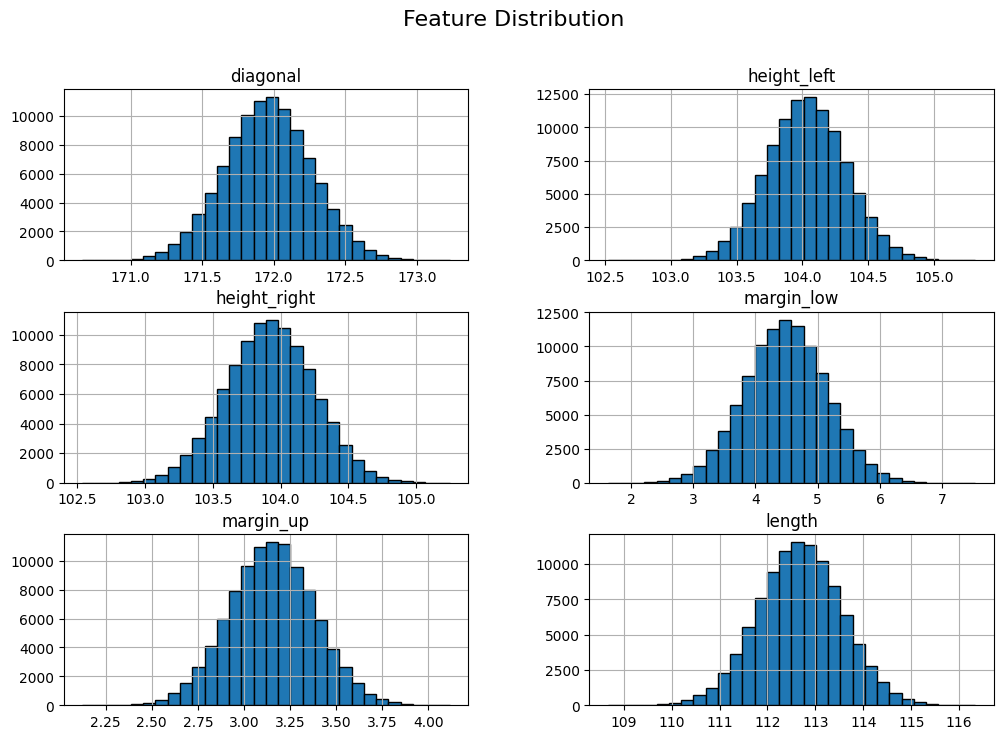

In [12]:
# Plot histograms for all numerical features
Fake_Bill.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

### Observations
* diagonal, height_left, height_right, and margin_up has no significant outliers
* Outliers are present in margin_low and length
* Outliers in margin_low and length may help distinguish fake bills.
* Removing them could lead to loss of important classification patterns.
* Tree-based models handle outliers well, so removal isn’t necessary for now.

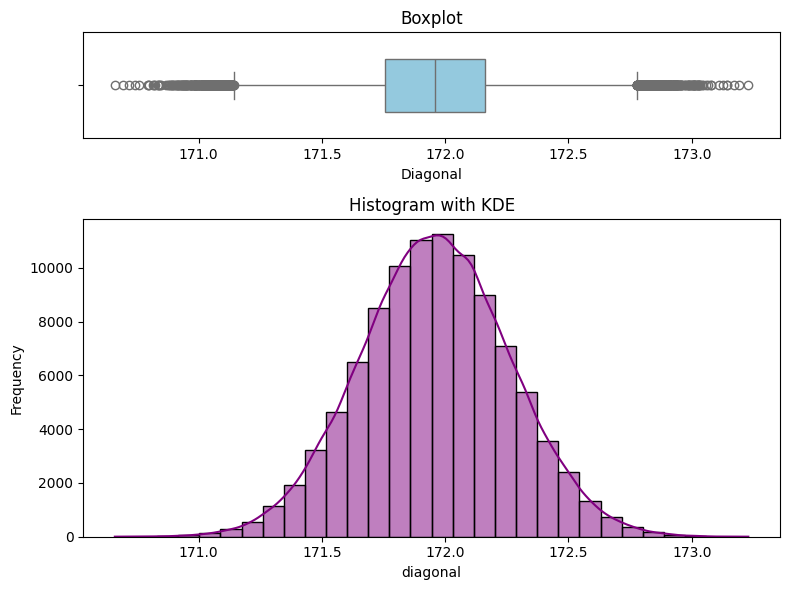

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=Fake_Bill["diagonal"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Diagonal")

sns.histplot(Fake_Bill['diagonal'], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("diagonal")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

### Observations
* There is no strong skewness, indicating that the diagonal feature is fairly symmetric.
* Range is centered around 172.0, meaning most values fall within this range.
*  Diagonal column follows normal distribution

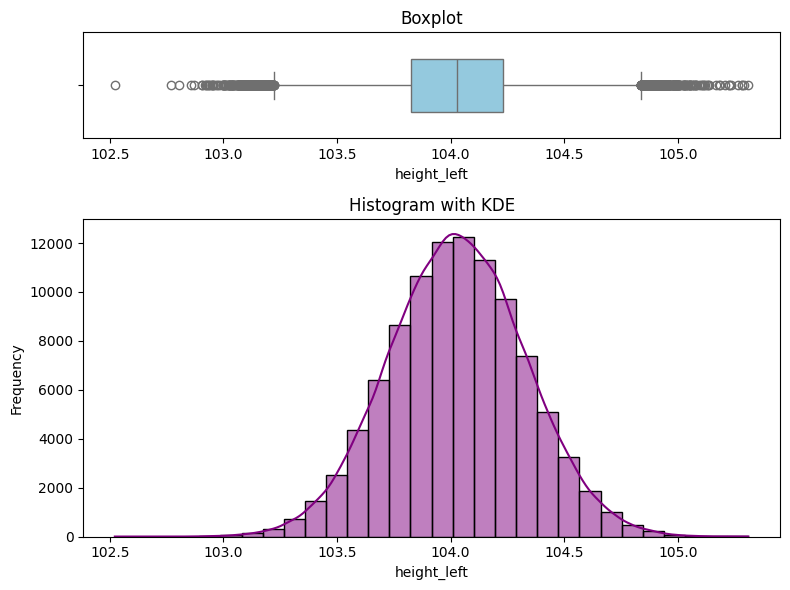

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=Fake_Bill["height_left"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("height_left")

sns.histplot(Fake_Bill['height_left'], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("height_left")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

### Observations
* There is no strong skewness, indicating that the diagonal feature is fairly symmetric.
* Range is centered around 104.0, meaning most values fall within this range.
* Height_left column follows normal distribution

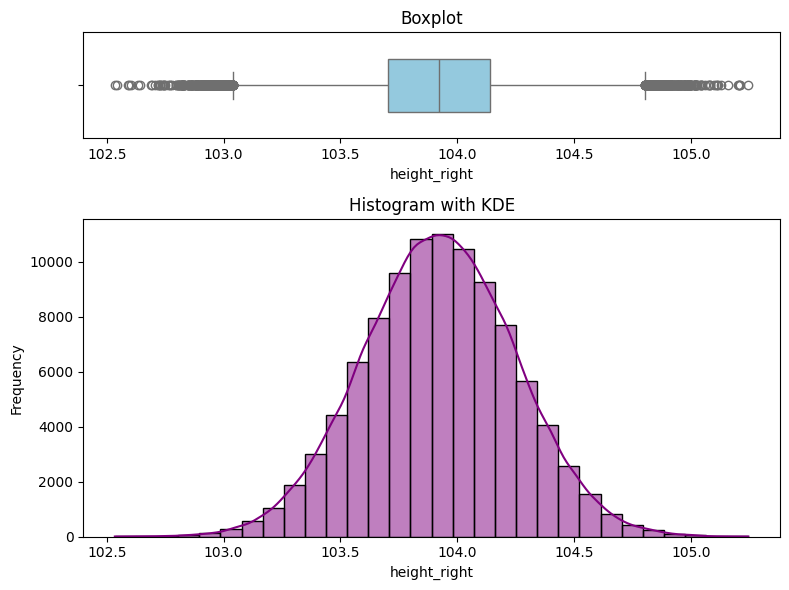

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=Fake_Bill["height_right"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("height_right")

sns.histplot(Fake_Bill['height_right'], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("height_right")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

### Observations
* There is no strong skewness, indicating that the diagonal feature is fairly symmetric.
* Range is centered around 104.0, meaning most values fall within this range.
* Height_right column follows normal distribution

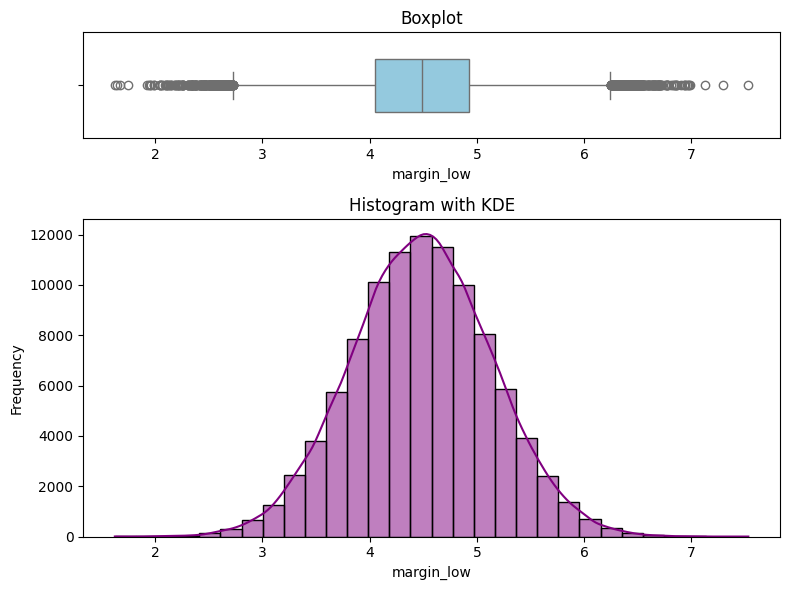

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=Fake_Bill["margin_low"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("margin_low")

sns.histplot(Fake_Bill['margin_low'], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("margin_low")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

### Observations
* There is no strong skewness, indicating that the diagonal feature is fairly symmetric.
* Range is centered around 4.5, meaning most values fall within this range.
* Margin_low column follows normal distribution

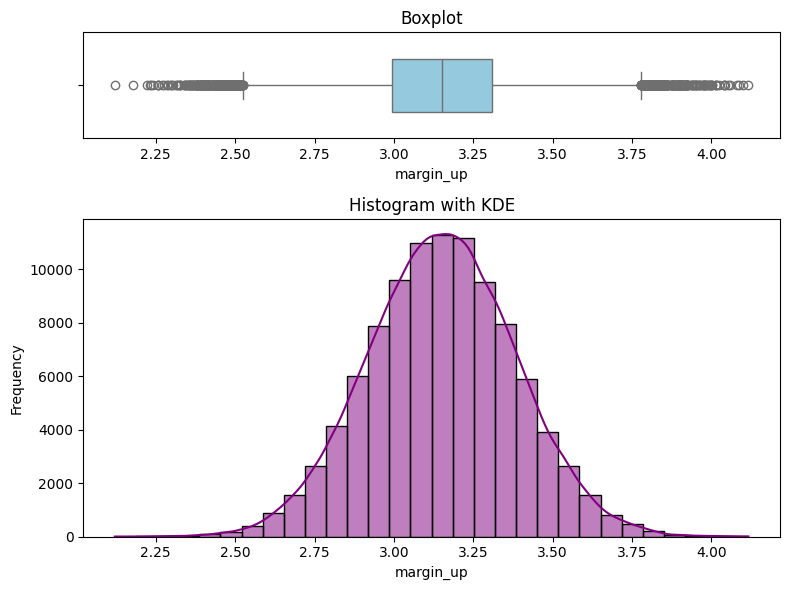

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=Fake_Bill["margin_up"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("margin_up")

sns.histplot(Fake_Bill['margin_up'], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("margin_up")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

### Observations
* There is no strong skewness, indicating that the diagonal feature is fairly symmetric.
* Range is centered around 3.00 to 3.25, meaning most values fall within this range.
* Margin_up column follows normal distribution

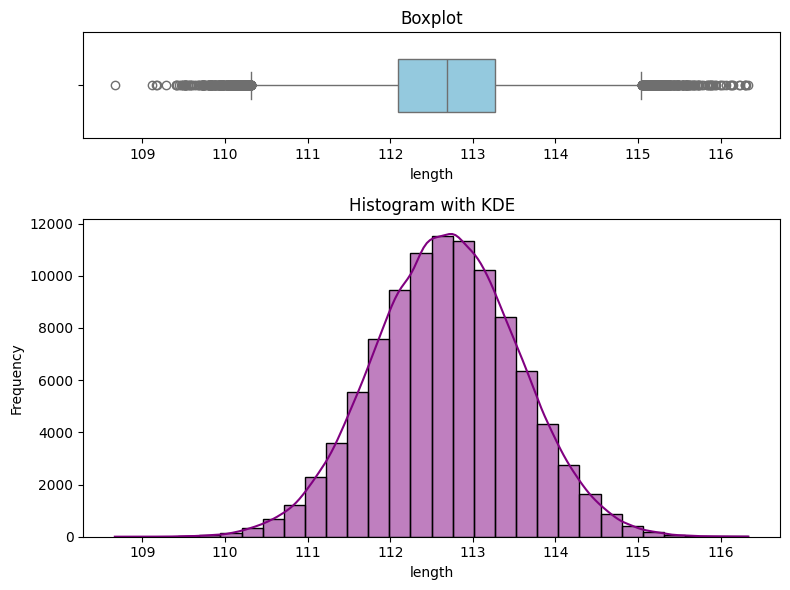

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=Fake_Bill["length"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("length")

sns.histplot(Fake_Bill['length'], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("length")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

### Observation
* There is no strong skewness, indicating that the diagonal feature is fairly symmetric.
* Range is centered around 112.5, meaning most values fall within this range.
* Length column follows normal distribution

In [19]:
Fake_Bill.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [20]:
Fake_Bill.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.000644,-0.002361,-0.001708,-0.010657,-0.008057,0.007467
diagonal,0.000644,1.000000,0.002543,-0.000079,0.000552,-0.002878,0.001978
height_left,-0.002361,0.002543,1.000000,-0.001840,0.003130,-0.003726,-0.002152
height_right,-0.001708,-0.000079,-0.001840,1.000000,0.004306,0.001434,-0.004226
margin_low,-0.010657,0.000552,0.003130,0.004306,1.000000,0.011607,-0.013690
margin_up,-0.008057,-0.002878,-0.003726,0.001434,0.011607,1.000000,-0.002357
length,0.007467,0.001978,-0.002152,-0.004226,-0.013690,-0.002357,1.000000


In [21]:
print(Fake_Bill.dtypes)

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object


In [22]:
print(Fake_Bill.isnull().sum())


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [23]:
print(Fake_Bill.applymap(lambda x: str(x).strip() if isinstance(x, str) else x).head())


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  


<ipython-input-23-eb1a48829499>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(Fake_Bill.applymap(lambda x: str(x).strip() if isinstance(x, str) else x).head())


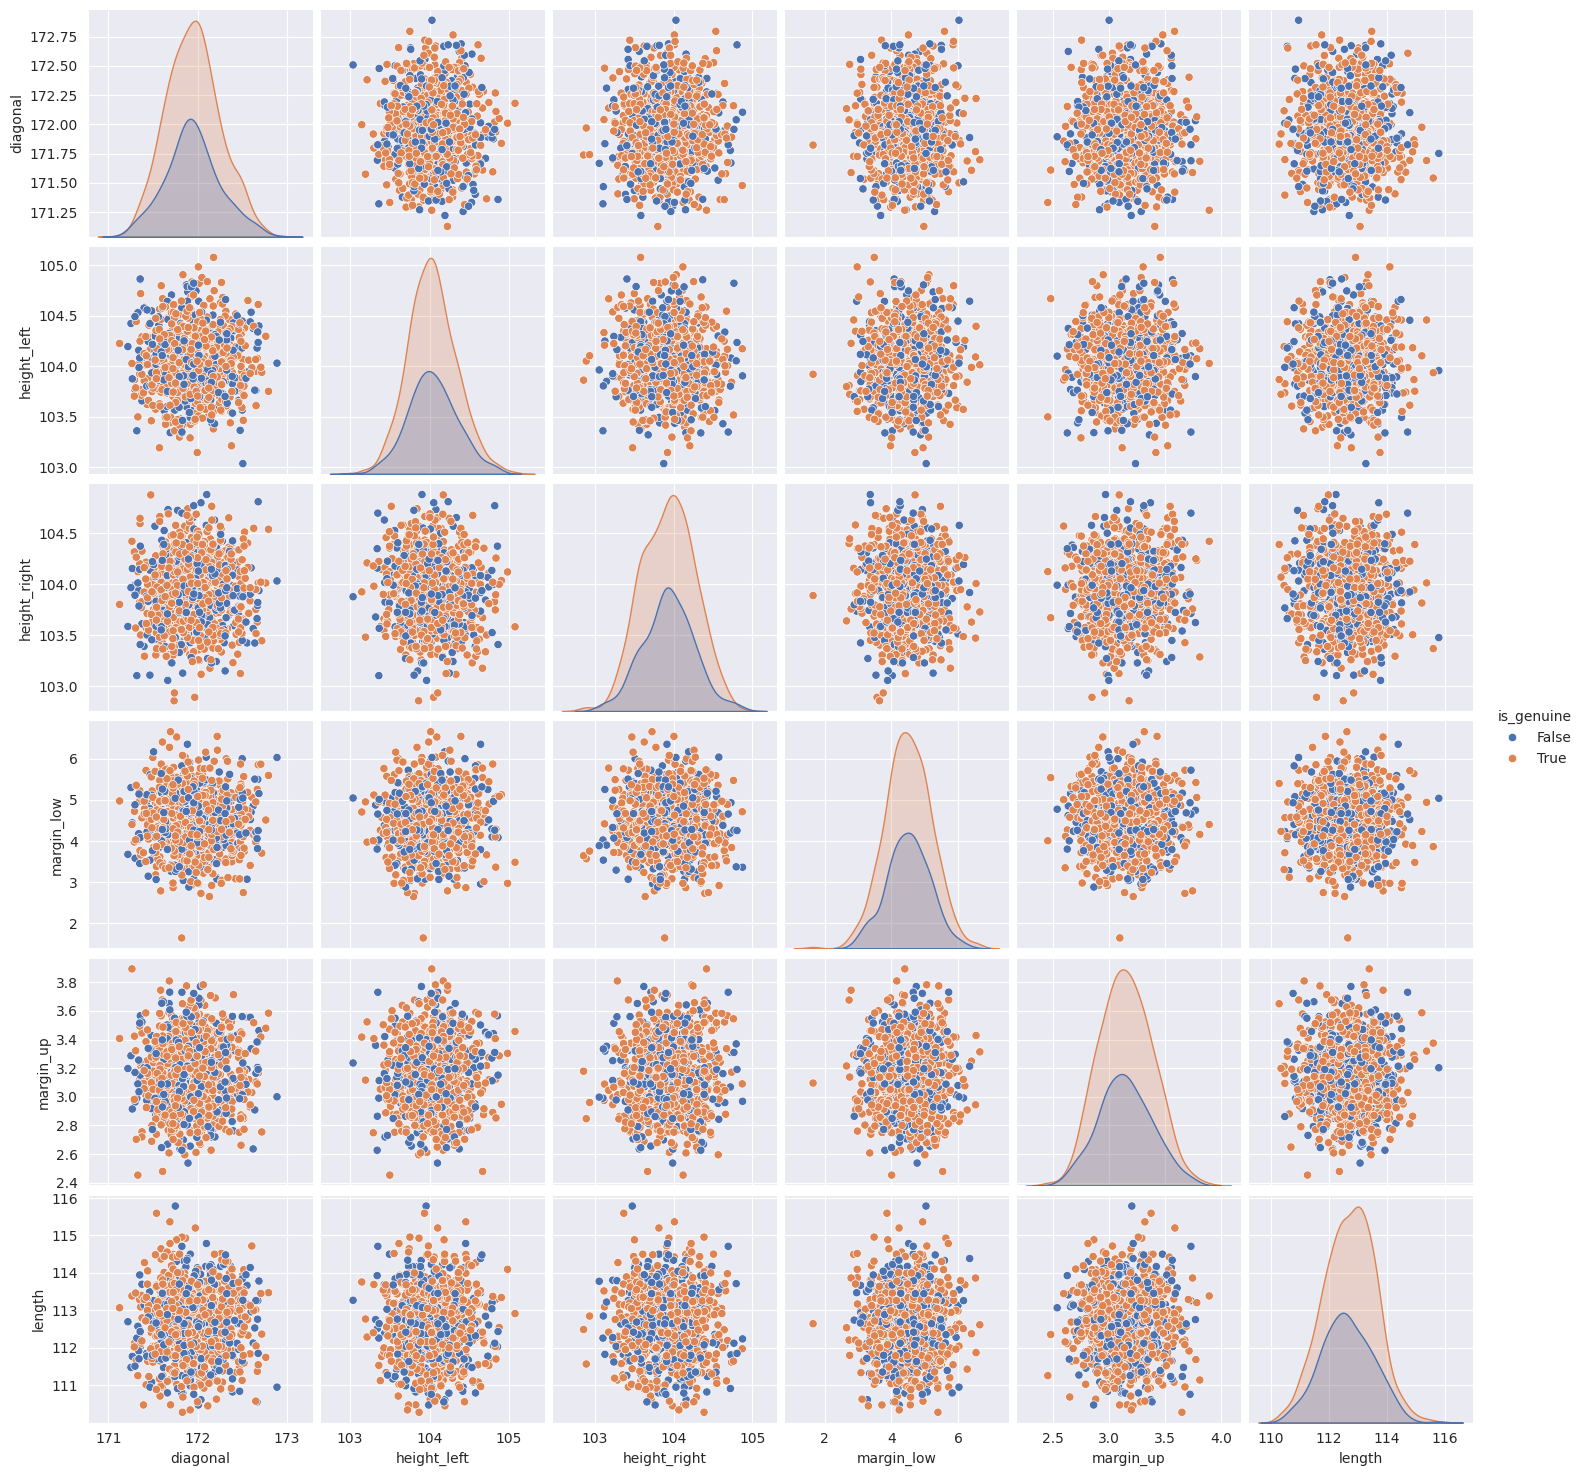

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.pairplot(Fake_Bill.sample(min(1000, len(Fake_Bill))), hue="is_genuine", diag_kind="kde", palette="deep")
plt.show()

### Observations
* No strong correlations, length and diagonal have the highest but weak.
* Most features show weak or no linear relationships.
* Margin_low and length have a slight negative correlation.
* is_genuine isn’t strongly linked to any feature.
* No multicollinearity concerns becuase  no two independent features have high correlation.

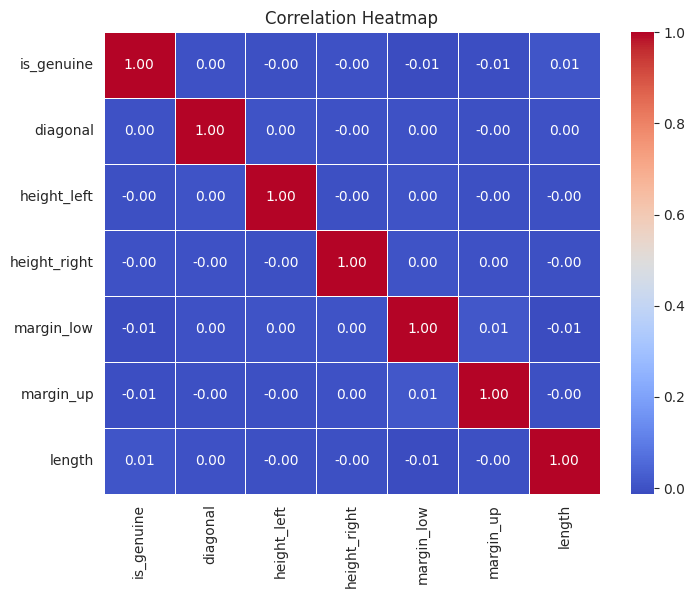

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(Fake_Bill.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


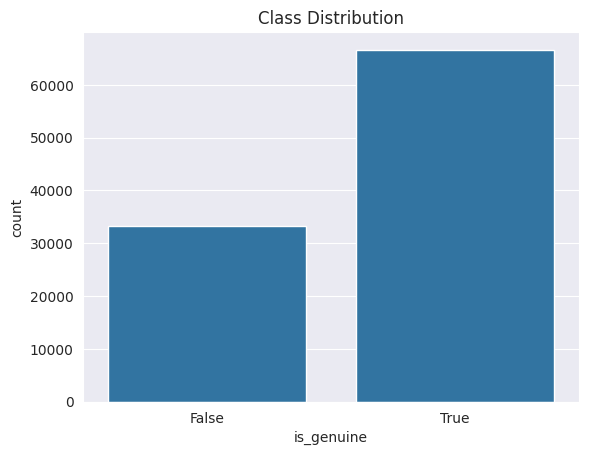

In [20]:
# checking if the data is imbalance for is_genuine
sns.countplot(x=Fake_Bill["is_genuine"])
plt.title("Class Distribution")
plt.show()

### Observations
* The dataset is imbalanced, with more genuine bills than fake bills.
* This imbalance may cause a bias in classification models, making them favor genuine bills.

In [26]:
Fake_Bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   is_genuine    100000 non-null  bool   
 1   diagonal      100000 non-null  float64
 2   height_left   100000 non-null  float64
 3   height_right  100000 non-null  float64
 4   margin_low    100000 non-null  float64
 5   margin_up     100000 non-null  float64
 6   length        100000 non-null  float64
dtypes: bool(1), float64(6)
memory usage: 4.7 MB


In [27]:
#divide the data set into x and y columns
X = Fake_Bill.iloc[:, 1:]  # Select all columns except the first (is_genuine)
Y = Fake_Bill.iloc[:, 0]   # Select the first column (is_genuine)

In [28]:
Y

,is_genuine
0,True
1,True
2,True
3,True
4,True
...,...
99995,True
99996,False
99997,True
99998,True


In [29]:
# Splitting the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state = 1)
x_train

,diagonal,height_left,height_right,margin_low,margin_up,length
80630,172.303698,104.328148,104.317207,5.113640,2.734878,114.089223
62017,171.903572,104.069074,104.008430,3.785530,2.811617,112.655374
5005,171.944080,104.301862,103.973274,4.238733,3.330736,112.650179
56849,171.887161,104.144046,103.786472,4.063242,3.034611,111.536694
42434,171.676315,103.893759,103.590398,4.301860,3.148978,113.157732
...,...,...,...,...,...,...
50057,171.622008,103.533080,103.609002,4.895290,3.516022,113.797164
98047,171.743273,103.855096,103.959868,4.683703,3.030813,112.263880
5192,171.978370,103.782669,104.116877,3.866491,3.178710,113.262101
77708,171.842577,103.966268,104.043376,4.964237,3.508340,113.705915


### Observations
* test_size=0.3 → 30% of data is used for testing, 70% for training.
* random_state=1 → Ensures reproducibility.

In [30]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
print(clf)

DecisionTreeClassifier(criterion='entropy', max_depth=2)


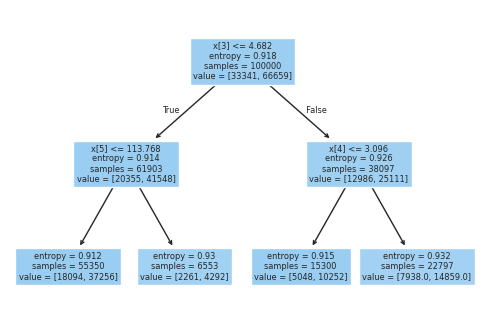

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt
clf.fit(X, Y)
plt.figure(figsize=(6, 4))
tree.plot_tree(clf, filled=True)
plt.show()

### Ensemble Methods

In [33]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = Fake_Bill.iloc[:, 1:]
Y = Fake_Bill.iloc[:, 0]

kfold = StratifiedKFold(n_splits=5, random_state=2023, shuffle=True)

model = RandomForestClassifier(n_estimators=100, random_state=20, max_depth=None, n_jobs=-1)

results = cross_val_score(model, X, Y, cv=kfold, n_jobs=-1)

print(results)
print(results.mean())


[0.65465 0.65835 0.65445 0.65855 0.6558 ]
0.65636


In [34]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [3, 5, None],
    'min_samples_leaf': [5, 10],
    'n_estimators': [50, 100, 200],
    'max_features': ["sqrt", "log2"],
    'criterion': ["gini", "entropy"]
}

random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=params, n_iter=20,
    cv=3, n_jobs=-1, verbose=5, scoring="accuracy", random_state=42
)

random_search.fit(X, Y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=5)

In [31]:
print(random_search.best_params_)
print(random_search.best_score_)

{'n_estimators': 100, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'gini'}
0.6665900000333177


In [33]:
random_search.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [35]:
model_best=RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)
model.fit(X,Y)
model.feature_importances_

array([0.16622408, 0.16701184, 0.16641926, 0.16629663, 0.16663508,
       0.16741312])

In [36]:
df=pd.DataFrame(model.feature_importances_,columns=["Importance score"],index=X.columns)
df.sort_values(by="Importance score")

,Importance score
diagonal,0.166224
margin_low,0.166297
height_right,0.166419
margin_up,0.166635
height_left,0.167012
length,0.167413


In [44]:
model.fit(x_train, y_train)

# Making predictions
y_pred = model.predict(x_test)

# Generating classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.34      0.04      0.07      9995
        True       0.67      0.96      0.79     20005

    accuracy                           0.66     30000
   macro avg       0.51      0.50      0.43     30000
weighted avg       0.56      0.66      0.55     30000



In [ ]:
### XGBOOST


In [ ]:
pip install xgboost


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [46]:
# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)
print(x_test_scaled)

[[ 1.13512592  0.99412364  1.21329562  0.95371832 -1.79271399  1.61252817]
 [-0.17865149  0.130371    0.26756729 -1.07349665 -1.46238171 -0.03169552]
 [-0.04564593  0.90648602  0.1598936  -0.38173203  0.77221746 -0.03765297]
 ...
 [ 0.06694176 -0.82450597  0.59972137 -0.94991852  0.11780401  0.6640514 ]
 [-0.37892092 -0.21238791  0.37460178  0.72567037  1.53672976  1.17298152]
 [ 0.41216144 -0.18041248  0.67510723 -0.63081448  1.01694137  0.35091531]]
[[ 1.03150095 -0.18788532  0.10367756 -1.26546088 -0.45025779 -1.71736628]
 [ 0.31094452 -0.80987303 -2.3297868   0.62785007  0.29009416  0.35450581]
 [ 0.85556682  0.09110377 -0.84636688 -0.83060766  0.49391473  0.21846727]
 ...
 [-0.55004912 -0.67207632 -0.59577941 -1.42257421  0.61141561  0.91002626]
 [ 0.19673023 -0.86842313 -0.09859102  0.29110704 -0.62013926 -0.08179585]
 [ 0.41960361  0.21332867 -0.28481813  1.61065464 -0.90323264 -0.07490406]]


In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# XGBoost classifier instantiation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Corrected Hyperparameter grid
param_dist = {
    'n_estimators': [100, 150, 200, 300],
    'learning_rate': [0.01, 0.1, 0.15],  # Fixed duplicate values
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.8, 0.1],  # Fixed incorrect parameter name
    'colsample_bytree': [0.8, 1.0]
}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized SearchCV with recall scoring
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,  # Number of different hyperparameter combinations to try
    cv=skf,
    scoring='recall',  # Maximizing recall
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model to training data
random_search.fit(x_train, y_train)

# Print best parameters and best recall score
print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:24:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.1, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best Recall Score: 1.0


In [48]:
# Fit the RandomizedSearchCV model
random_search.fit(x_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-validated Recall:", random_search.best_score_)

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(x_test_scaled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:25:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.1, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best Cross-validated Recall: 1.0


In [49]:
# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[    0  9995]
 [    0 20005]]

Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00      9995
        True       0.67      1.00      0.80     20005

    accuracy                           0.67     30000
   macro avg       0.33      0.50      0.40     30000
weighted avg       0.44      0.67      0.53     30000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
best_model.feature_importances_

array([0.1558706 , 0.16063862, 0.17464188, 0.1639337 , 0.16902415,
       0.17589104], dtype=float32)

In [53]:
import pandas as pd

# Extract feature importances from the best model
features = pd.DataFrame(
    best_model.feature_importances_,
    index=x_train.columns,  # Use X_train columns to match features
    columns=["Importance"]
)

# Sort feature importances in descending order
df1 = features.sort_values(by="Importance", ascending=False)

# Display the feature importances
print(df1)

              Importance
length          0.175891
height_right    0.174642
margin_up       0.169024
margin_low      0.163934
height_left     0.160639
diagonal        0.155871


<ipython-input-55-b9e040ea62f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x=df1.index, y="Importance", palette="Set2")


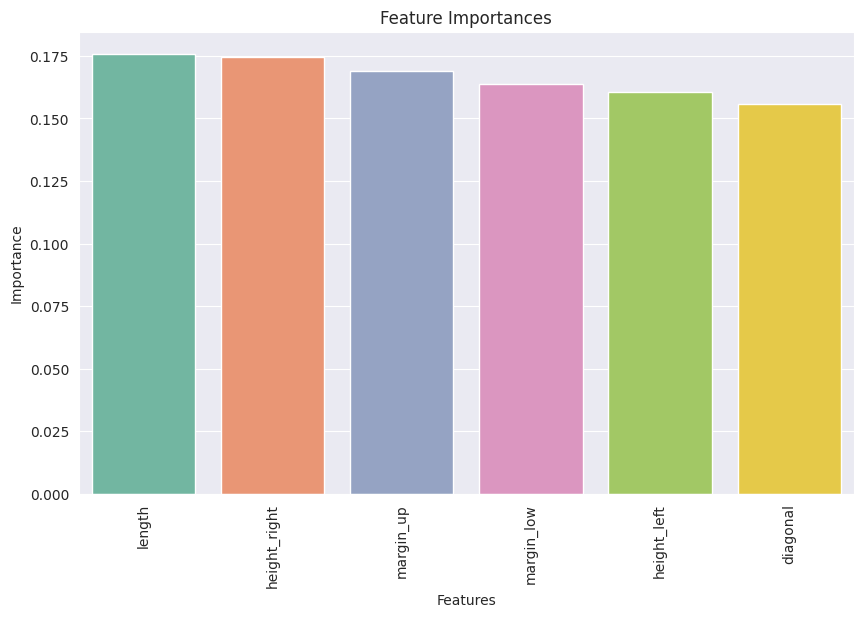

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(data=df1, x=df1.index, y="Importance", palette="Set2")

# Improve readability
plt.xticks(rotation=90)  # Rotate feature names for clarity
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")

# Show plot
plt.show()
